In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv",encoding="latin1")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


<Axes: ylabel='Amount'>

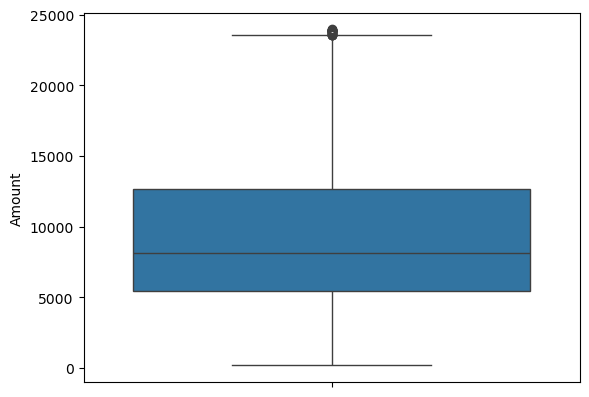

In [7]:
sns.boxplot(df["Amount"])

In [8]:
df["Amount"] = df["Amount"].fillna(df["Amount"].mean())

In [9]:
df["Amount"].isnull().sum()

0

In [10]:
df["Amount"] = df["Amount"].astype(int)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# EDA

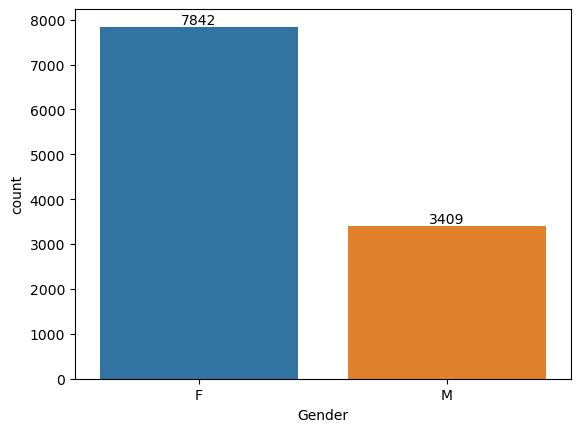

In [12]:
ax = sns.countplot(x="Gender",data=df,hue="Gender")
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# or
for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Gender,Amount
0,F,74430383
1,M,31932182


In [14]:
sales_gen = df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

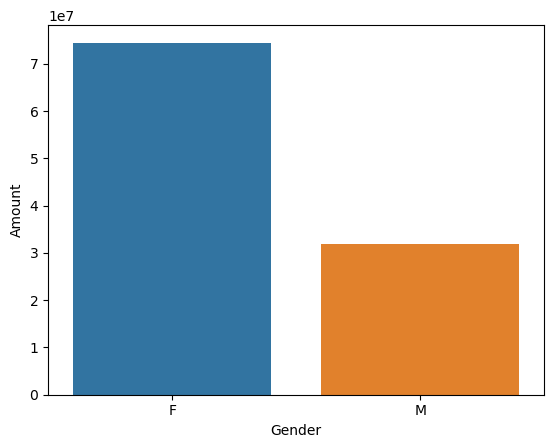

In [15]:
ax = sns.barplot(x="Gender",y="Amount",data=sales_gen,hue="Gender")

### from above graph we can see that most of the buyers are females even the purchasing power are higher than man

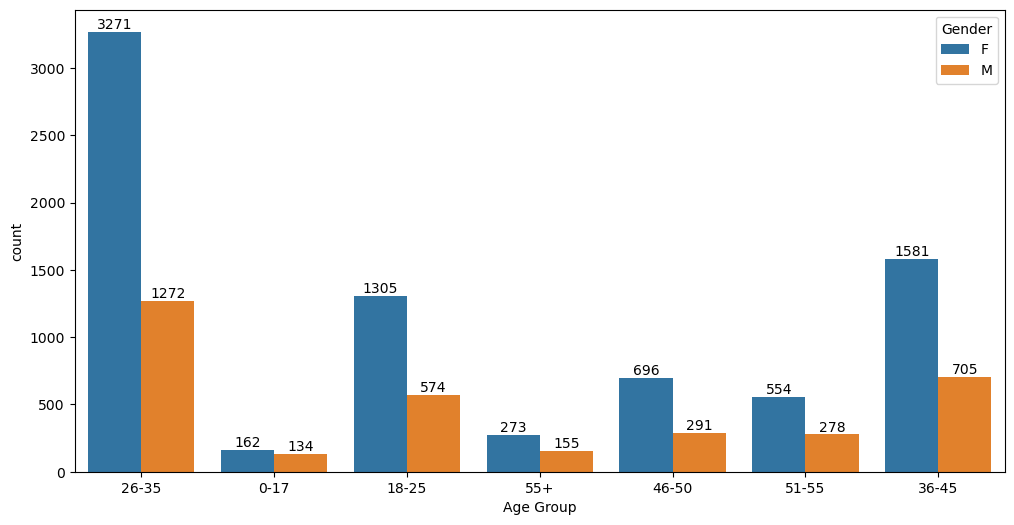

In [16]:
plt.figure(figsize=(12,6))

ax = sns.countplot(x="Age Group",data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
sale_by_age = df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sale_by_age

,Age Group,Amount
2,26-35,42632348
3,36-45,22173353
1,18-25,17240732
4,46-50,9245656
5,51-55,8280383
6,55+,4090440
0,0-17,2699653


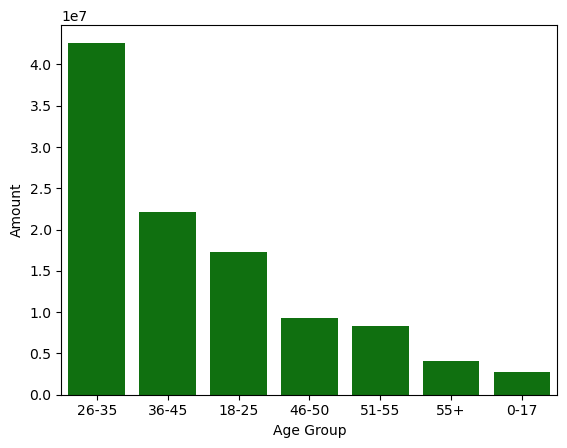

In [18]:
sns.barplot(x="Age Group",y="Amount",data=sale_by_age,color="g")
plt.show()

### from above graph you can see that age between 26-35 has the highest purchase

# state

In [19]:
state_sale = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
state_sale

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


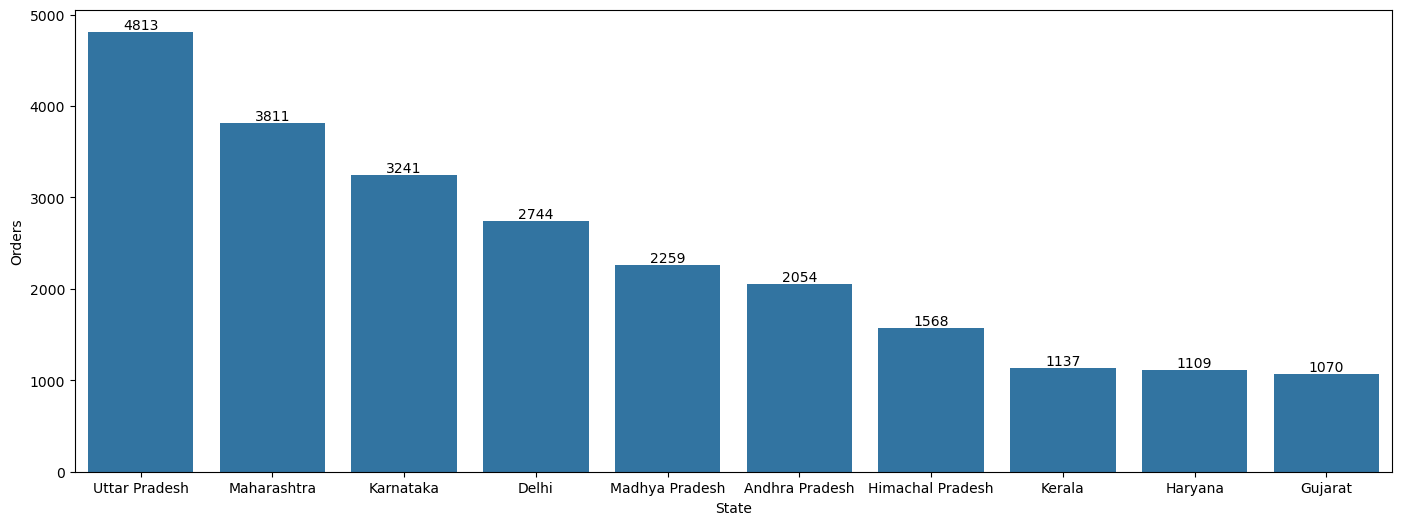

In [20]:
plt.figure(figsize=(17,6))

ax = sns.barplot(x="State",y="Orders",data=state_sale)

for bars in ax.containers:
    ax.bar_label(bars)

### from above graph you can see that utter pardesh has the highest orders of number

In [21]:
state_purchase = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
state_purchase

,State,Amount
14,Uttar Pradesh,19393874
10,Maharashtra,14436996
7,Karnataka,13532993
2,Delhi,11632177
9,Madhya Pradesh,8120048
0,Andhra Pradesh,8046599
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3964988


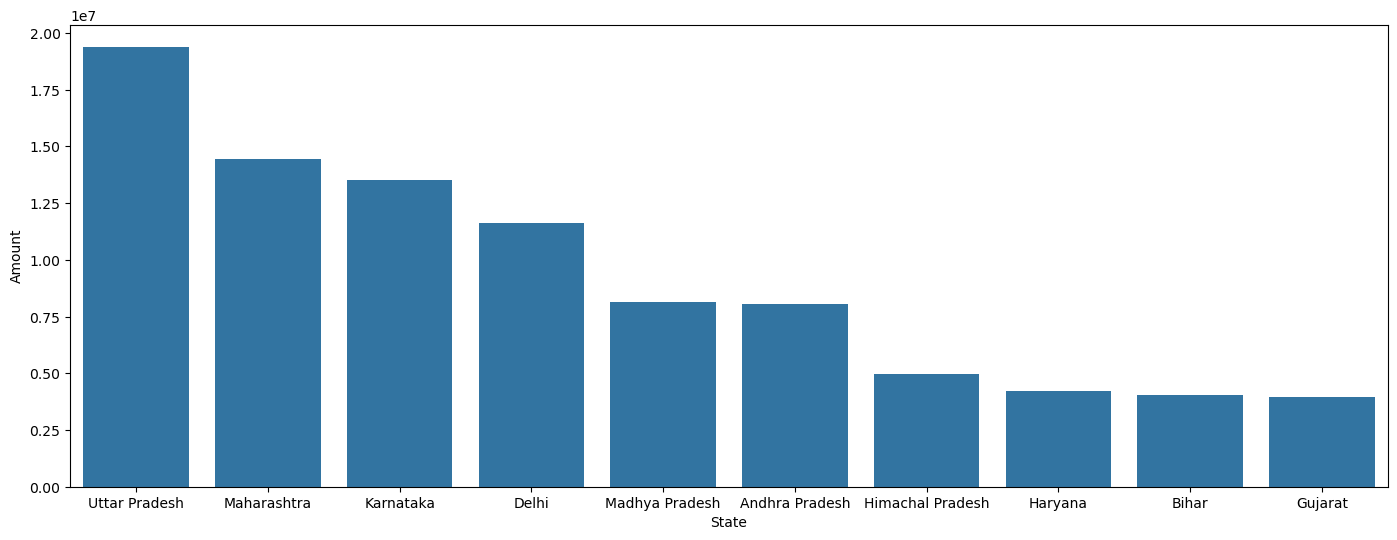

In [37]:
plt.figure(figsize=(17,6))

ax = sns.barplot(x="State",y="Amount",data=state_purchase)


### from above graph you can see that most of the total sales and order are from  UP MP and Karnatak

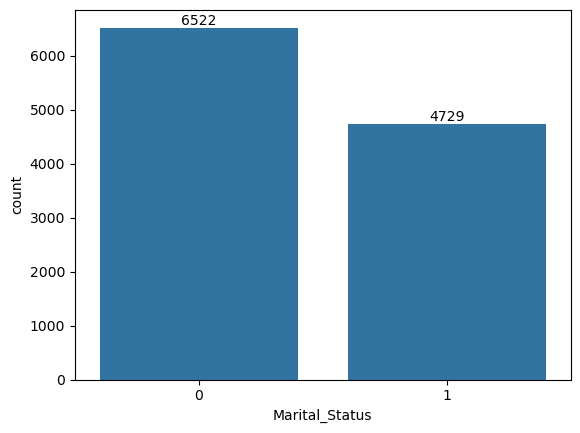

In [23]:
ax = sns.countplot(x="Marital_Status",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
sales_by_Marital_Status = df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_by_Marital_Status

,Marital_Status,Gender,Amount
0,0,F,43815005
2,1,F,30615378
1,0,M,18348191
3,1,M,13583991


<Axes: xlabel='Marital_Status', ylabel='Amount'>

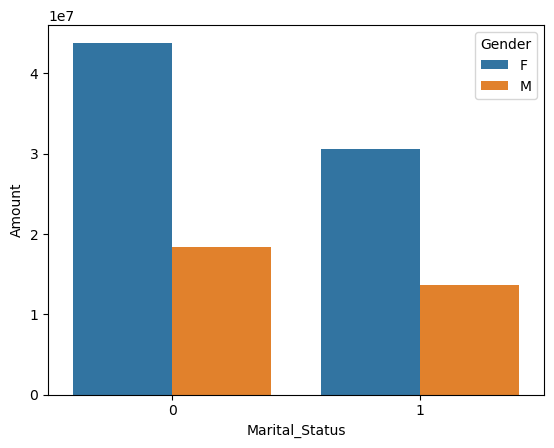

In [25]:
sns.barplot(x="Marital_Status",y="Amount",data=sales_by_Marital_Status,hue="Gender")

### from above graph most of the buyers are married(women) compare to men and they have high purchasing power

# Occupation

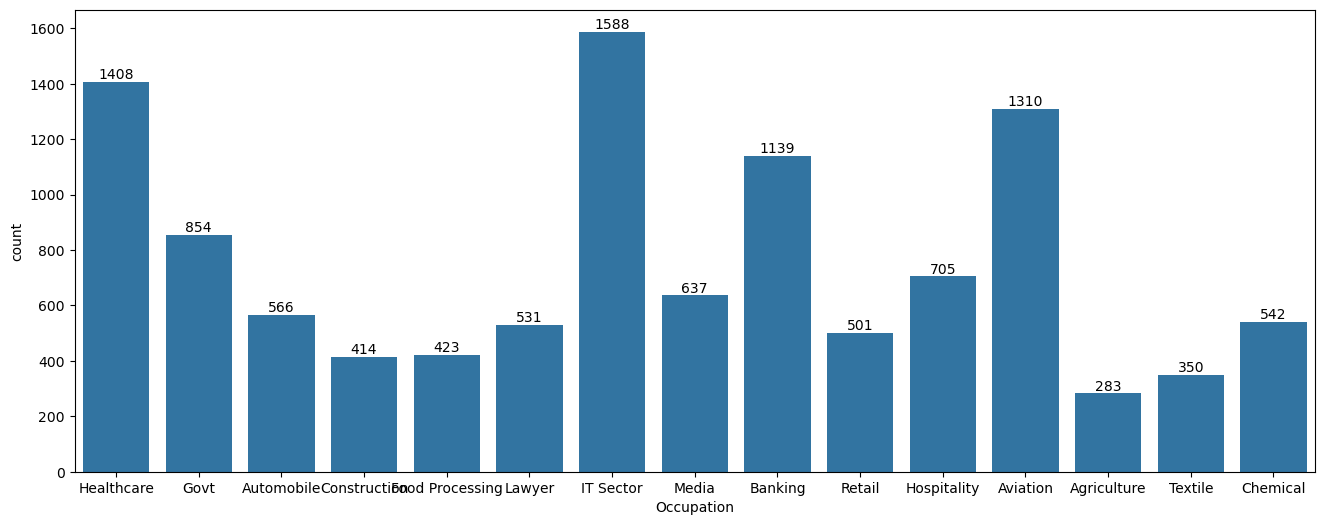

In [38]:
plt.figure(figsize=(16,6))


ax = sns.countplot(x="Occupation",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
occ= df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

<Axes: xlabel='Occupation', ylabel='Amount'>

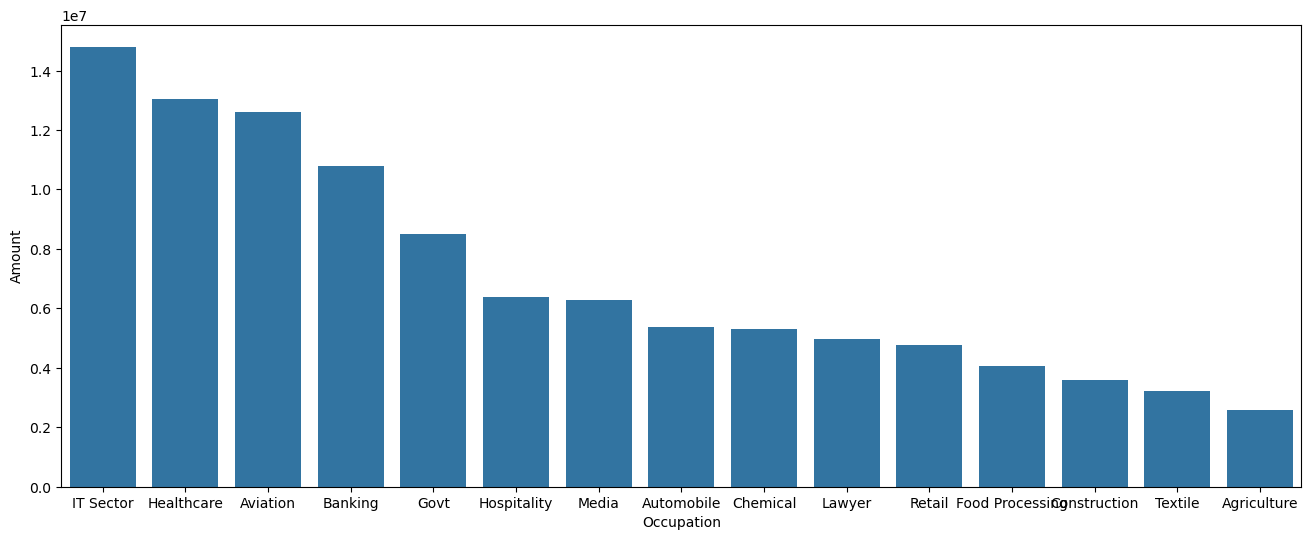

In [39]:
plt.figure(figsize=(16,6))

sns.barplot(x="Occupation",y="Amount",data=occ)

### from above we can see that most of the buyers are from IT Sector , HealthCare and Aviation

In [29]:
product_sale = df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
product_sale

,Product_Category,Amount
6,Food,33962242
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15622474
8,Furniture,5449504
9,Games & Toys,4331694
14,Sports Products,3635933
0,Auto,1986968
1,Beauty,1959484
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

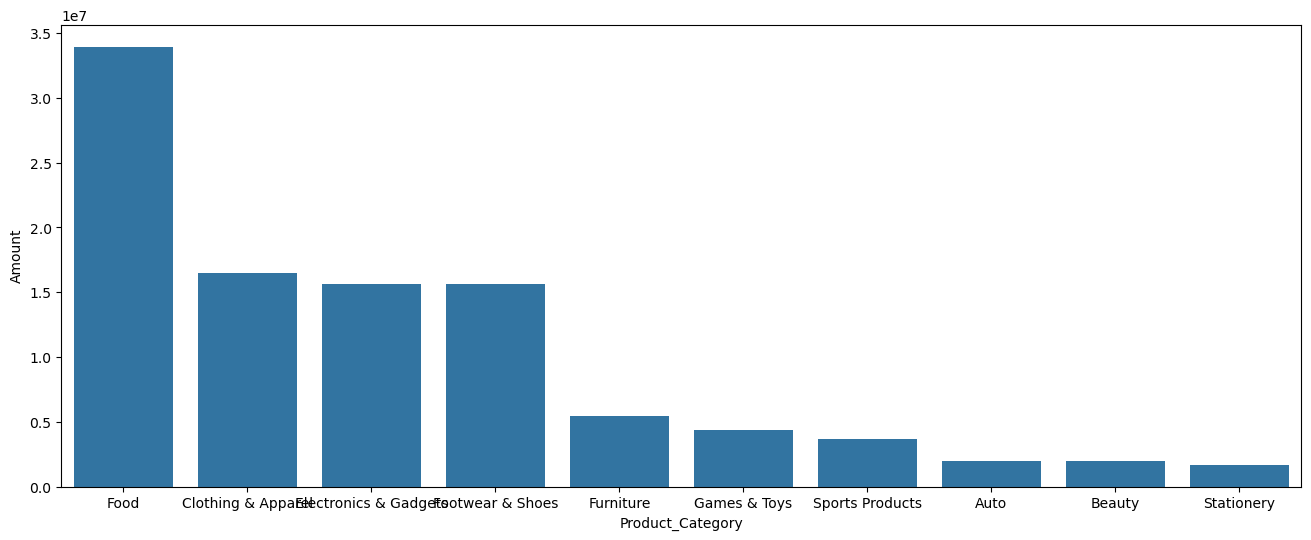

In [40]:
plt.figure(figsize=(16,6))

sns.barplot(x="Product_Category",y="Amount",data=product_sale)

### highest purchase is from food category

In [31]:
order_by_ID = df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
order_by_ID

,Product_ID,Orders
1680,P00265242,127
645,P00110942,116
1505,P00237542,91
1147,P00184942,82
680,P00114942,79
172,P00025442,79
889,P00145042,76
709,P00117942,76
299,P00044442,75
644,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

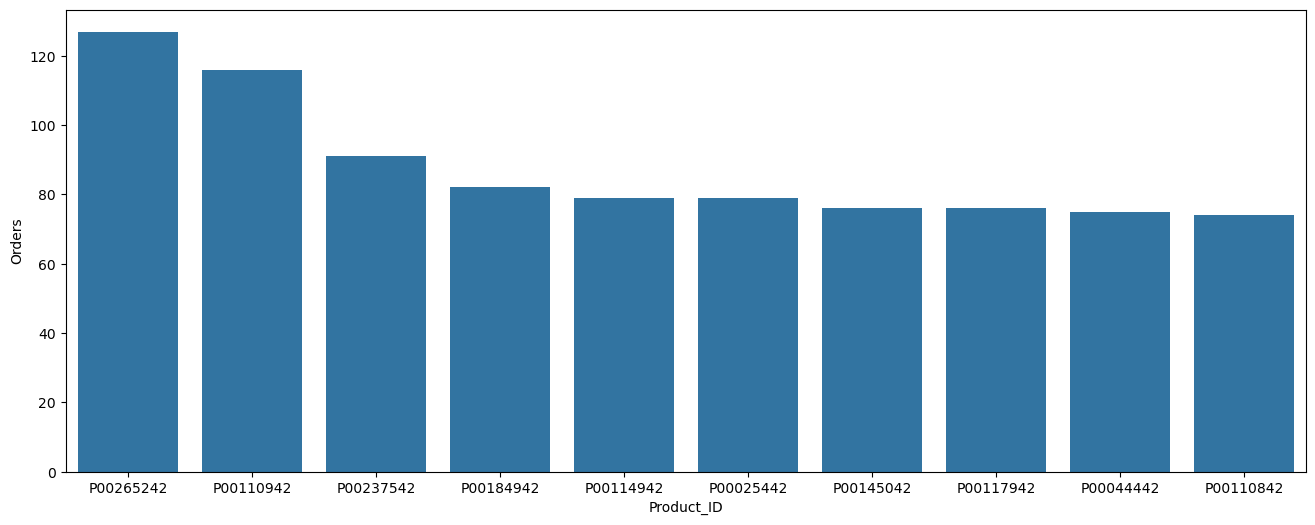

In [41]:
plt.figure(figsize=(16,6))

sns.barplot(x="Product_ID",y="Orders",data=order_by_ID)

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
df.shape

(11251, 13)